--2018-04-09 13:33:12--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Felix_Titling_sample.png/1280px-Felix_Titling_sample.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77080 (75K) [image/png]
Saving to: ‘sample.png’

sample.png          100%[===================>]  75.27K  --.-KB/s    in 0.1s    

2018-04-09 13:33:12 (580 KB/s) - ‘sample.png’ saved [77080/77080]

===== READING DATA ========
===== Done READING DATA ========


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


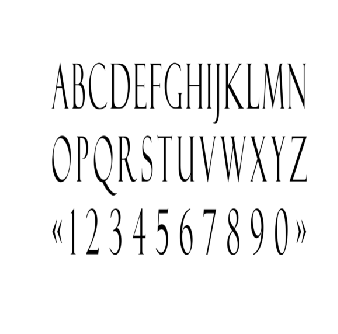

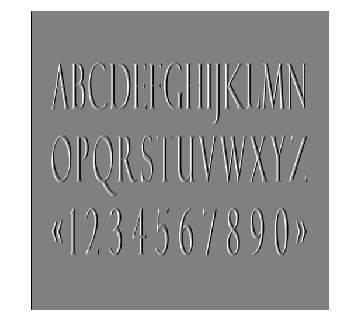

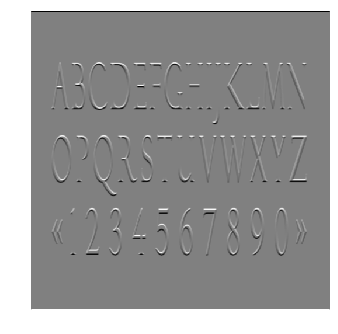

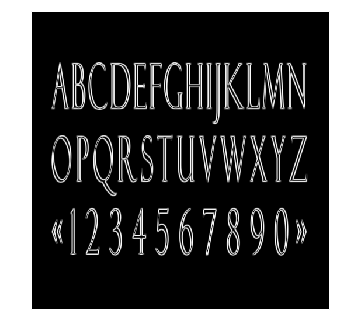

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in true_divide


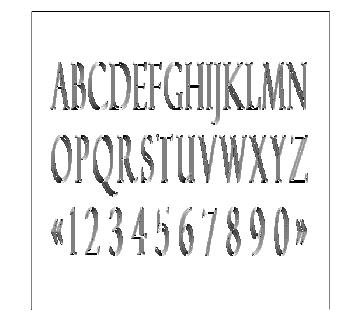

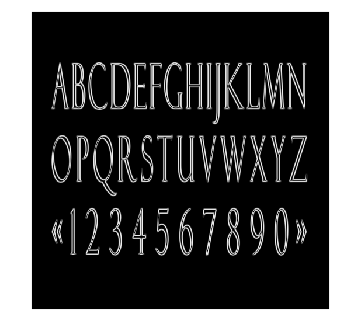

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:155: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:155: RuntimeWarning: invalid value encountered in true_divide


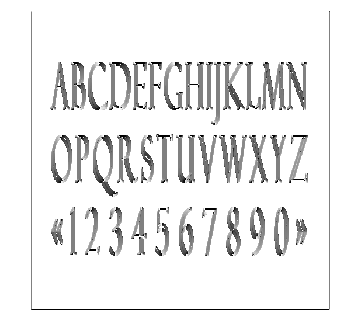

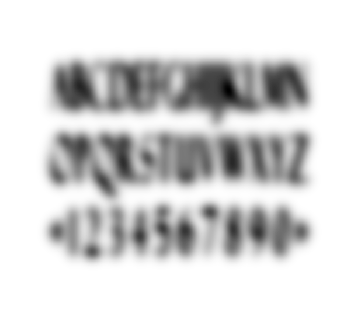

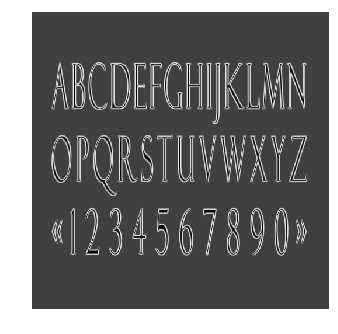

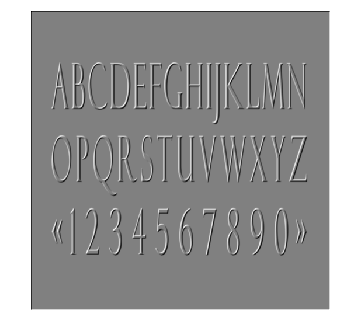

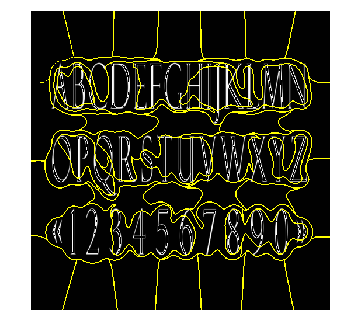

done


In [ ]:
!wget -O 'sample.png' https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Felix_Titling_sample.png/1280px-Felix_Titling_sample.png
import numpy as np
import os,sys
from scipy.ndimage import imread
from scipy.misc import imresize
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import scipy 
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# 0. Read the images
PathDicom = "./images/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        lstFilesDCM.append(os.path.join(dirName,filename))

lstFilesDCM = ['sample.png']        
        
# 0. Read the data into Numpy
one = np.zeros((1,512,512))

# 0.5 Transfer All of the Data into array
print('===== READING DATA ========')
for file_index in range(len(lstFilesDCM)):
    one[file_index,:,:]   = imresize(imread(lstFilesDCM[file_index],mode='F',flatten=True),(512,512))
print('===== Done READING DATA ========')


# 1. Identity
kernerl = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

for x in range(len(one)):
    temp = convolve2d(one[x,:,:],kernerl,mode='same')
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()

# 2. Edge Detection (Horizontal)
kernerl = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

for x in range(len(one)):
    temp = convolve2d(one[x,:,:],kernerl,mode='same')
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()

# 3. Edge Detection (Vertical)
kernerl = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

for x in range(len(one)):
    temp = convolve2d(one[x,:,:],kernerl,mode='same')
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()

# 4. Gradient Magnitude
kernerl1 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
kernerl2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

for x in range(len(one)):
    temp1 = convolve2d(one[x,:,:],kernerl1,mode='same')
    temp2 = convolve2d(one[x,:,:],kernerl2,mode='same')
    
    temp3 = np.sqrt(temp1**2 + temp2**2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()


# 5. Gradient Direction
kernerl1 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
kernerl2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

for x in range(len(one)):
    temp1 = convolve2d(one[x,:,:],kernerl1,mode='same')
    temp2 = convolve2d(one[x,:,:],kernerl2,mode='same')
    
    temp3 = np.arctan(temp1/temp2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()


# 6. Sobel Gradient Magnitude
kernerl1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

for x in range(len(one)):
    temp1 = convolve2d(one[x,:,:],kernerl1,mode='same')
    temp2 = convolve2d(one[x,:,:],kernerl2,mode='same')
    
    temp3 = np.sqrt(temp1**2 + temp2**2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()


# 7. Sobel Gradient Direction
kernerl1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

for x in range(len(one)):
    temp1 = convolve2d(one[x,:,:],kernerl1,mode='same')
    temp2 = convolve2d(one[x,:,:],kernerl2,mode='same')
    
    temp3 = np.arctan(temp1/temp2)

    plt.axis('off')
    plt.imshow(temp3,cmap='gray')
    plt.show()


# 8. Guassian Blur
for x in range(len(one)):
    temp = scipy.ndimage.filters.gaussian_filter(
        one[x,:,:],
        sigma = 10
        )
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()




# 9. Sharpening
kernerl1 = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
kernerl2 = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

for x in range(len(one)):
    temp1 = convolve2d(one[x,:,:],kernerl1,mode='same')
    temp2 = convolve2d(one[x,:,:],kernerl2,mode='same')
    
    temp3 = np.sqrt(temp1**2 + temp2**2)

    plt.axis('off')
    plt.imshow(temp3 +one[x,:,:] ,cmap='gray')
    plt.show()



# 10. Emboss
kernerl = np.array([
    [-1,-1,0],
    [-1,0,1],
    [0,1,1]
])

for x in range(len(one)):
    temp = convolve2d(one[x,:,:],kernerl,mode='same') + 128
    plt.axis('off')
    plt.imshow(temp,cmap='gray')
    plt.show()



# 11. Super Pixel
for x in range(len(one)):
    segments = slic(one[x,:,:], n_segments = 50, sigma = 10)
    plt.axis('off')
    plt.imshow(mark_boundaries(one[x,:,:], segments))
    plt.show()




print('done')

# -- end code --